In [29]:
import pretty_midi
#64, 69
path = './result/from_scratch_69.midi'

midi_data = pretty_midi.PrettyMIDI(path)
for instrument in midi_data.instruments:
    print(f"Instrument: {instrument.name}")
    for note in instrument.notes:
        print(f"Pitch: {note.pitch}, Start: {note.start}, End: {note.end}, Velocity: {note.velocity}")


Instrument: 
Pitch: 71, Start: 0.9661537499999999, End: 1.445325875, Velocity: 52
Pitch: 74, Start: 1.101289, End: 1.651748, Velocity: 60
Pitch: 76, Start: 1.3765185, End: 1.723176625, Velocity: 64
Pitch: 62, Start: 0.0, End: 2.223177, Velocity: 52
Pitch: 74, Start: 1.651748, End: 2.291984375, Velocity: 56
Pitch: 73, Start: 3.0593505000000003, End: 3.3450650000000004, Velocity: 60
Pitch: 76, Start: 3.6420945000000002, End: 3.9391240000000005, Velocity: 68
Pitch: 67, Start: 2.223177, End: 6.839159, Velocity: 60
Pitch: 76, Start: 3.9391240000000005, End: 6.839159, Velocity: 68
Pitch: 74, Start: 3.3450650000000004, End: 6.906726625, Velocity: 60
Pitch: 66, Start: 6.245100000000001, End: 6.974294250000001, Velocity: 52
Pitch: 71, Start: 2.773636, End: 7.041861875, Velocity: 68
Pitch: 64, Start: 6.839159, End: 7.962224000000001, Velocity: 60
Pitch: 73, Start: 6.839159, End: 10.902155500000001, Velocity: 68
Pitch: 69, Start: 7.962224000000001, End: 11.56492525, Velocity: 60
Pitch: 64, Start:

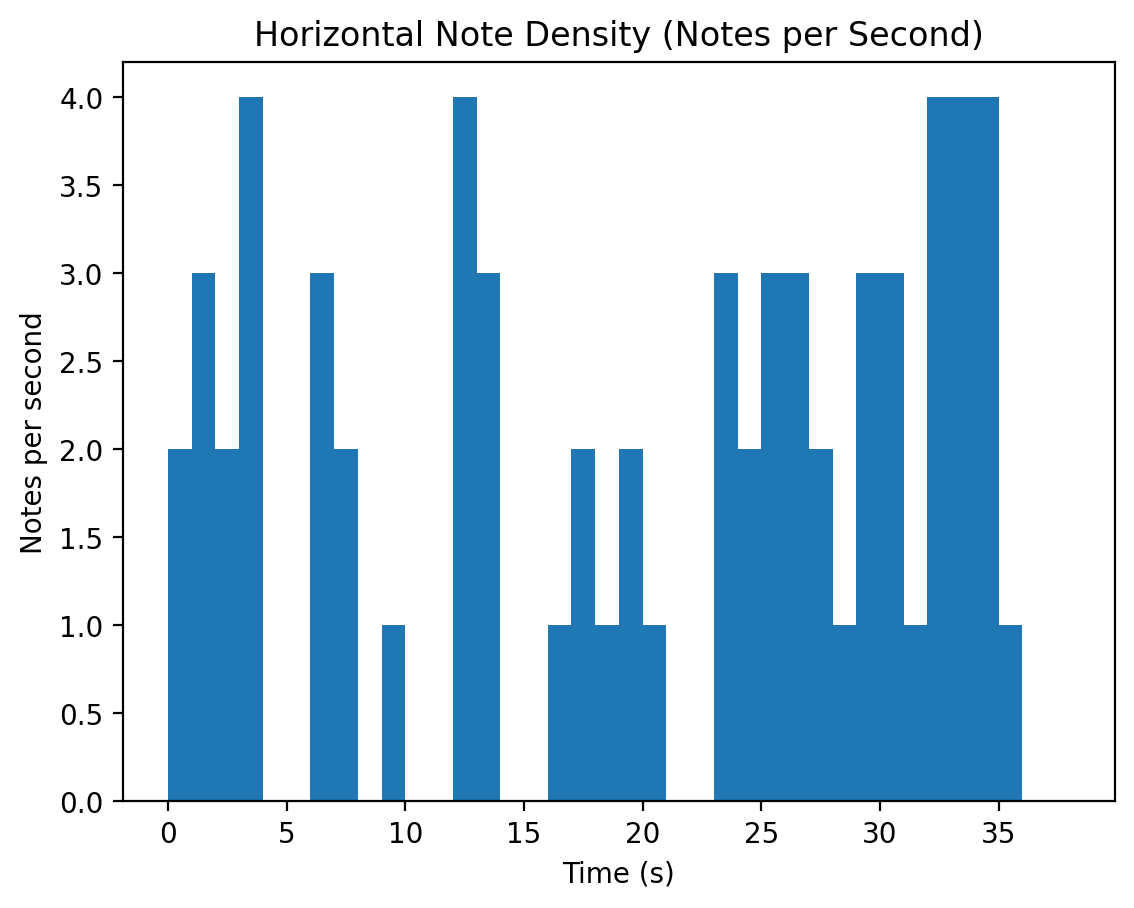

In [30]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI(path)

# Get all note start times
note_start_times = []
for instrument in midi_data.instruments:
    if not instrument.is_drum:
        for note in instrument.notes:
            note_start_times.append(note.start)

# Convert to numpy array for easier processing
note_start_times = np.array(note_start_times)

# Define bin size (e.g., 1 second)
bin_size = 1.0
max_time = midi_data.get_end_time()

# Create bins
bins = np.arange(0, max_time + bin_size, bin_size)

# Count notes in each bin
note_density, _ = np.histogram(note_start_times, bins=bins)

# Plot
plt.bar(bins[:-1], note_density, width=bin_size, align='edge')
plt.xlabel('Time (s)')
plt.ylabel('Notes per second')
plt.title('Horizontal Note Density (Notes per Second)')
plt.show()


In [31]:
from music21 import converter, key

score = converter.parse('./result/from_scratch_64.midi')
key_signature = score.analyze('key')
print(f"Key: {key_signature}")

Key: E major


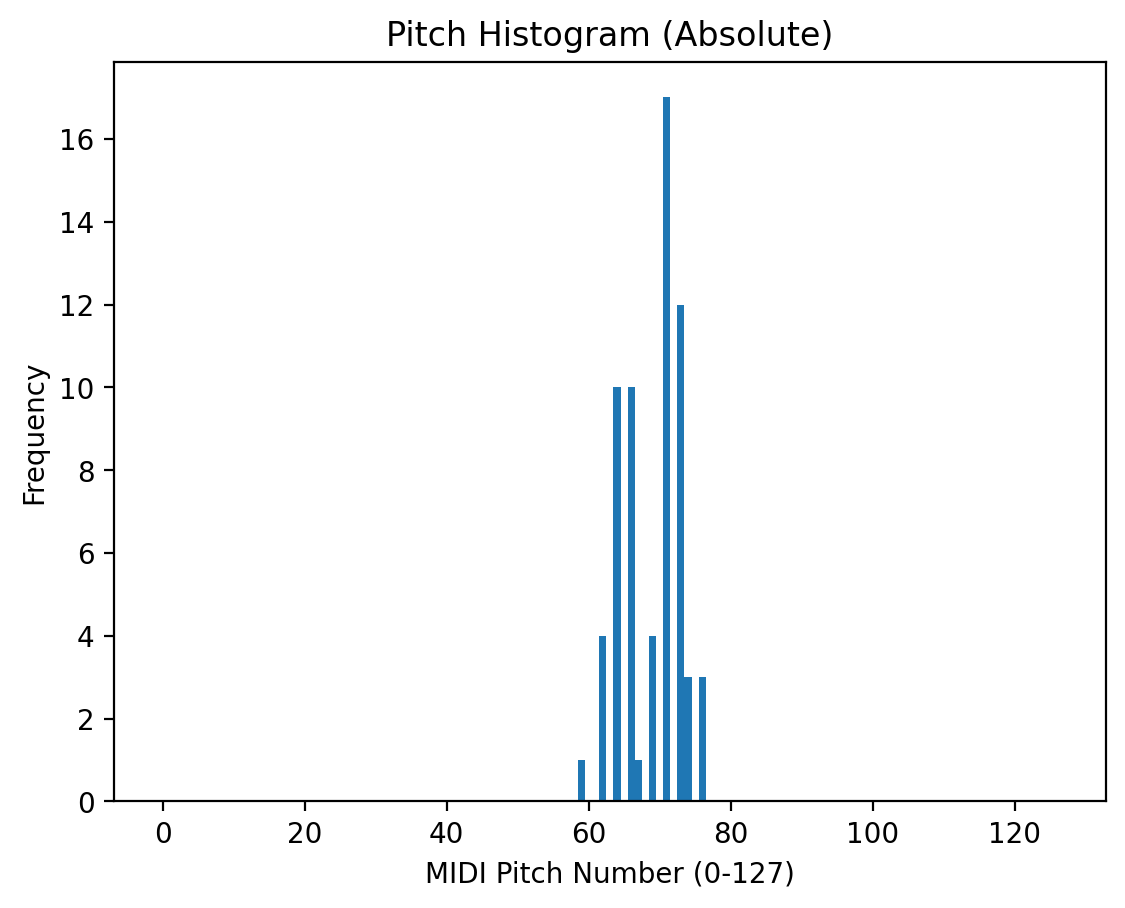

In [32]:

import pretty_midi
import numpy as np
import matplotlib.pyplot as plt

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI(path)

# Get all pitches
pitches = []
for instrument in midi_data.instruments:
    if not instrument.is_drum:
        for note in instrument.notes:
            pitches.append(note.pitch)

# Convert to numpy array
pitches = np.array(pitches)

# Create histogram bins (0-127)
bins = np.arange(128)

# Count occurrences
hist, _ = np.histogram(pitches, bins=bins)

# Plot
plt.bar(bins[:-1], hist, width=1.0)
plt.xlabel('MIDI Pitch Number (0-127)')
plt.ylabel('Frequency')
plt.title('Pitch Histogram (Absolute)')
plt.show()


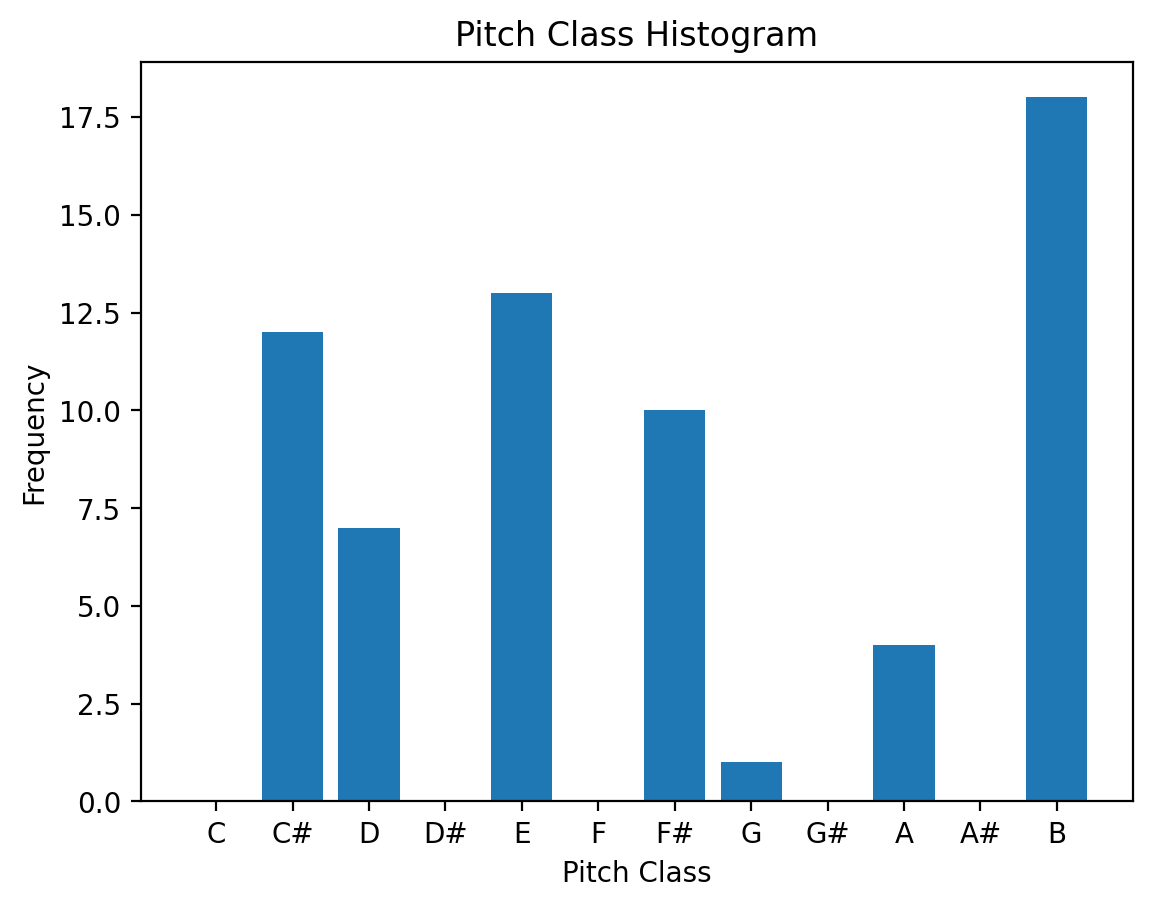

In [33]:
# Compute pitch classes
pitch_classes = pitches % 12

# Create histogram bins (0-11)
bins_pc = np.arange(13)

# Count occurrences
hist_pc, _ = np.histogram(pitch_classes, bins=bins_pc)

# Map pitch classes to note names for x-axis
pitch_class_names = ['C', 'C#', 'D', 'D#', 'E', 'F',
                     'F#', 'G', 'G#', 'A', 'A#', 'B']

# Plot
plt.bar(pitch_class_names, hist_pc)
plt.xlabel('Pitch Class')
plt.ylabel('Frequency')
plt.title('Pitch Class Histogram')
plt.show()


In [34]:
import pretty_midi
import numpy as np

def average_note_density_per_bar(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    
    # Get note start times
    note_start_times = []
    for instrument in midi_data.instruments:
        if not instrument.is_drum:
            for note in instrument.notes:
                note_start_times.append(note.start)
    
    note_start_times = np.array(note_start_times)
    
    # If no notes, return 0
    if len(note_start_times) == 0:
        return 0
    
    # Get tempo changes (assume constant if no changes)
    tempo_changes_times, tempi = midi_data.get_tempo_changes()
    tempo = tempi[0]  # Take the first tempo (in BPM)
    
    # Get time signature changes (assume 4/4 if none)
    time_signatures = midi_data.time_signature_changes
    if time_signatures:
        ts = time_signatures[0]
        numerator = ts.numerator
        denominator = ts.denominator
    else:
        numerator = 4
        denominator = 4

    # Compute seconds per bar
    beats_per_bar = numerator
    seconds_per_beat = 60.0 / tempo
    seconds_per_bar = beats_per_bar * seconds_per_beat
    
    # Get total number of bars in piece
    total_duration = midi_data.get_end_time()
    total_bars = int(np.ceil(total_duration / seconds_per_bar))
    
    # Bin notes into bars
    bar_edges = np.arange(0, total_bars * seconds_per_bar + seconds_per_bar, seconds_per_bar)
    notes_per_bar, _ = np.histogram(note_start_times, bins=bar_edges)
    
    # Compute average notes per bar
    avg_density = np.mean(notes_per_bar)
    
    return avg_density

# Example usage:
avg_density = average_note_density_per_bar(path)
print(f"Average horizontal note density per bar: {avg_density:.2f} notes/bar")


Average horizontal note density per bar: 3.82 notes/bar


In [35]:
midi_folder = './result/'

In [37]:
import glob
import os
midi_files = glob.glob(os.path.join(midi_folder, 'from_scratch_*.midi'))

# Process each file and store results
results = []
for midi_file in midi_files:
    density = average_note_density_per_bar(midi_file)
    print(f"{os.path.basename(midi_file)}: {density:.2f} notes/bar")
    results.append({'file': os.path.basename(midi_file), 'density': density})

# Optionally — convert to a pandas DataFrame if you want
import pandas as pd
df = pd.DataFrame(results)
print(df)


from_scratch_1137.midi: 8.44 notes/bar
from_scratch_896.midi: 24.00 notes/bar
from_scratch_310.midi: 13.78 notes/bar
from_scratch_1743.midi: 94.25 notes/bar
from_scratch_1295.midi: 3.33 notes/bar
from_scratch_381.midi: 14.44 notes/bar
from_scratch_109.midi: 7.11 notes/bar
from_scratch_731.midi: 8.72 notes/bar
from_scratch_19.midi: 13.06 notes/bar
from_scratch_1686.midi: 43.79 notes/bar
from_scratch_1780.midi: 97.75 notes/bar
from_scratch_1605.midi: 10.72 notes/bar
from_scratch_324.midi: 19.29 notes/bar
from_scratch_2073.midi: 16.47 notes/bar
from_scratch_1100.midi: 37.41 notes/bar
from_scratch_371.midi: 54.75 notes/bar
from_scratch_899.midi: 8.29 notes/bar
from_scratch_100.midi: 12.94 notes/bar
from_scratch_590.midi: 25.00 notes/bar
from_scratch_1976.midi: 16.95 notes/bar
from_scratch_114.midi: 13.00 notes/bar
from_scratch_1209.midi: 12.76 notes/bar
from_scratch_1053.midi: 6.12 notes/bar
from_scratch_495.midi: 17.42 notes/bar
from_scratch_1132.midi: 7.50 notes/bar
from_scratch_1501.mid

In [46]:
df

,file,density
0,from_scratch_1137.midi,8.444444
1,from_scratch_896.midi,24.000000
2,from_scratch_310.midi,13.777778
3,from_scratch_1743.midi,94.250000
4,from_scratch_1295.midi,3.333333
...,...,...
2084,from_scratch_1969.midi,21.047619
2085,from_scratch_1952.midi,29.909091
2086,from_scratch_1941.midi,35.375000
2087,from_scratch_1867.midi,19.875000


In [44]:
densities = df['density'].values

In [56]:
df.sort_values(by='density', ascending=False)

,file,density
1377,from_scratch_640.midi,152.500000
473,from_scratch_498.midi,147.428571
379,from_scratch_531.midi,144.000000
1383,from_scratch_9.midi,135.142857
1546,from_scratch_612.midi,121.285714
...,...,...
1868,from_scratch_1302.midi,3.035714
1089,from_scratch_1354.midi,2.652174
1030,from_scratch_1050.midi,2.611111
1816,from_scratch_1073.midi,2.400000


In [51]:
# Load your MIDI file
midi_data = pretty_midi.PrettyMIDI('result/from_scratch_641.midi')

# Access time signature changes
for ts in midi_data.time_signature_changes:
    print(f"Time: {ts.time:.2f} sec — {ts.numerator}/{ts.denominator}")

Time: 0.00 sec — 4/4


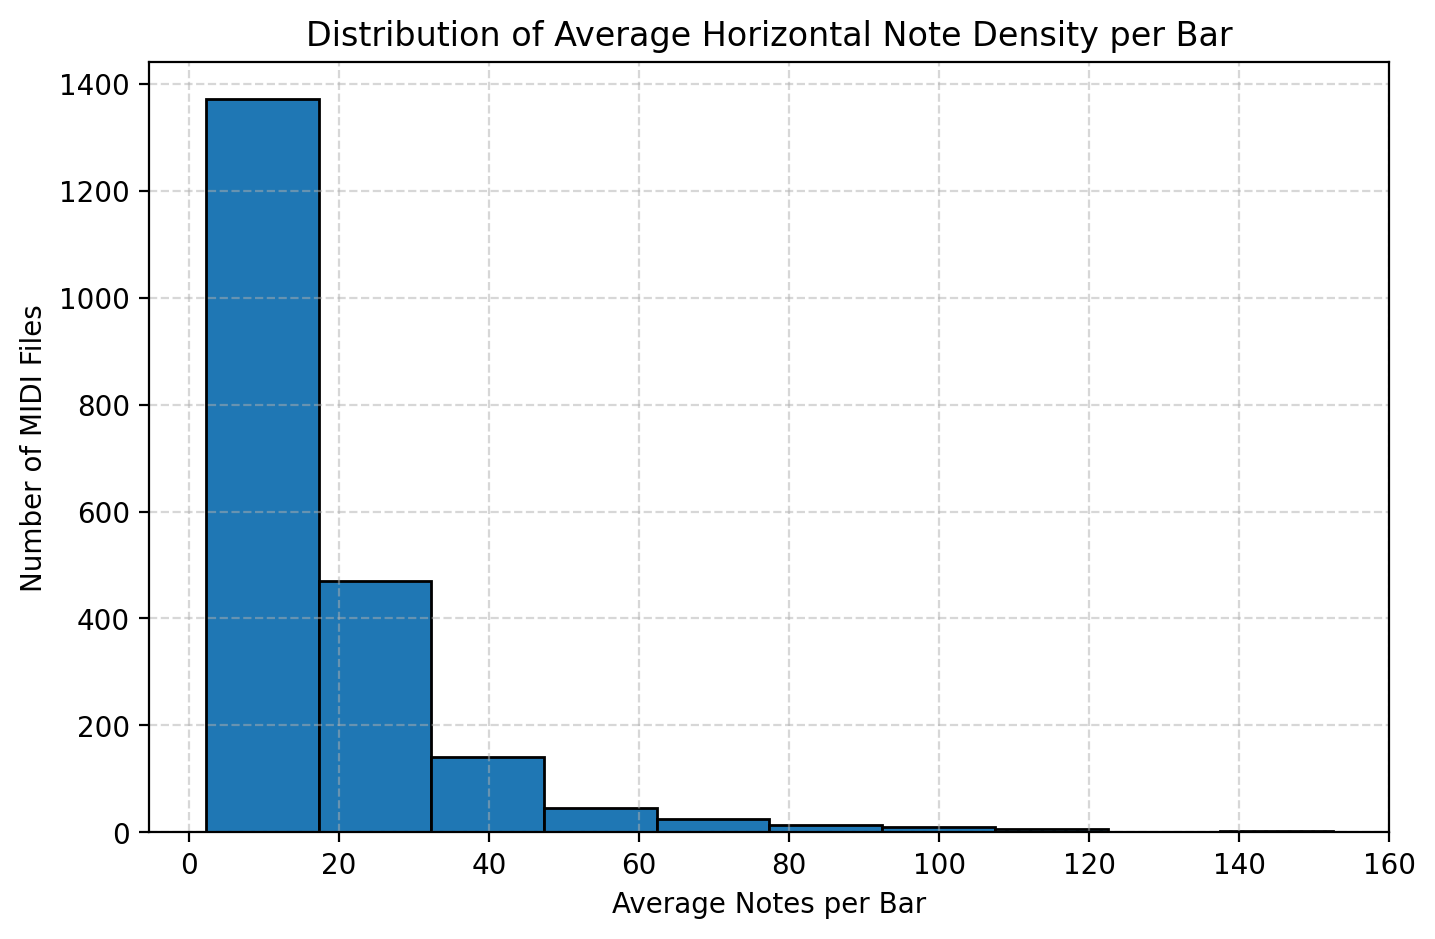

In [45]:
plt.figure(figsize=(8, 5))
plt.hist(densities, bins=10, edgecolor='black')
plt.xlabel('Average Notes per Bar')
plt.ylabel('Number of MIDI Files')
plt.title('Distribution of Average Horizontal Note Density per Bar')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Now say I want songs with average bar note density following a normal distribution centered around 70 with variance 10. 